In [2]:
import pandas as pd
import json

import numpy as np
import matplotlib.pyplot as plt

import pylab
import nltk
import operator 
from collections import Counter
import regex as re

import re
import string

json_tweet_btp='C:/Users/Robin/Dropbox/Travaux_&_Rapports_Stages/UbicomLab-GATech/MeToo/code/Data_tweets/clean_tweet.json'
json_btp_com='C:/Users/Robin/Dropbox/Travaux_&_Rapports_Stages/UbicomLab-GATech/MeToo/code/balancetonporc_com/strories_balancetonporc_com.json'
json_metoo='C:/Users/Robin/Dropbox/Travaux_&_Rapports_Stages/UbicomLab-GATech/MeToo/code/Data-metoo/clean_tweet_metoo.json'

df_story = pd.read_json(json_btp_com, orient="columns")
df_tweet = pd.read_json(json_tweet_btp, orient="columns")
df_metoo= pd.read_json(json_metoo, orient="columns")

# Useful Fonctions
### We decide to create method to drop tweet in function of the number of word, the user, the mention or the hashtag inside.
### Based on the analysis of the # and the mention, we could identify all the public chanel who are commenting the campaign, this tweets do not interest us.

In [3]:
def add_nombre_mot(df):
    nb_mots=[]
    for i in range(len(df['text'])):
        text=nltk.word_tokenize(df['text'].iloc[i])
        nb_mots.append(len(text))
    df['nb_mots']=nb_mots

#############################
def distribution(df,column,titre,xlim,ylim): #trace la distribution du colone de dataframe
    N=[]
    I=[]
    for i in range(xlim):
        I.append(i)
        N.append(len(df[df[column]==i]))
    fig1 = plt.figure(figsize = (30, 10))
    x = I
    height = N
    width = 0.5
    plt.tight_layout() #ajustement des etiquttes
    
     #fisrt graph
    plt.bar(x, height, width, color='b')
    plt.ylim(0,ylim)
    plt.xlim(0,xlim)
    plt.title(titre)
    plt.show()    
    
#############################
    
def drop_by_nb_of_word(df,nb_mots):
    d=0
    e=0
    i=0
    while i <len((df['text'])):
        if df['nb_mots'].iloc[i]<nb_mots:
            try:
                df.drop(df.index[i],inplace=True)
                d+=1
            except:
                e+=1
        i+=1
    print(d,"tweets have been deleted", '\n', 'there are',e,'errors')
    return(d)
#############################

def drop_by_user(df,users):
    d=0
    e=0
    i=0
    while i <len((df['user'])):
        if df['user'].iloc[i] in users:
            try:
                df.drop(df.index[i],inplace=True)
                d+=1
            except:
                e+=1
        i+=1
    print(d,"tweets have been deleted", '\n', 'there are',e,'errors')
    return(d)
#############################

remove_ponctuation = lambda x: ''.join(ch for ch in x if ch not in set(string.punctuation))
lower= lambda x: x.lower()
def formalize(df):
    df['user']=df['user'].map(lower)
    df['mention']=df['mention'].map(lower)
    df['hashtag']=df['hashtag'].map(lower)
    df['mention']=df['mention'].str.replace('@', '')
    df['mention']=df['mention'].map(remove_ponctuation)
#############################

def drop_by_mention(df,mention):
    d=0
    e=0
    i=0
    while i <len((df['text'])):
        if str(df['mention'].iloc[i]) in mention :
            try:
                df.drop(df.index[i],inplace=True)
                d+=1
            except:
                e+=1
        i+=1
    print(d,"tweets have been deleted", '\n', 'there are',e,'errors')
    return(d)
#############################    
def drop_by_hashtag(df,find_hashtag):
    d=0
    e=0
    i=0
    while i <len((df['text'])):
        text=str(df['hashtag'].iloc[i])
        if len(find_hashtag.findall(text))>=int(1):
            try:
                df.drop(df.index[i],inplace=True)
                d+=1
            except:
                e+=1
        i+=1
    print(d,"tweets have been deleted", '\n', 'there are',e,'errors')
    return(d)
#############################

def save(df,filename):
    df.to_json(filename)
    #df2=pd.read_json(filename, orient="columns")



# Data useful for the droping :
.

In [4]:

# list of the users that will be drop
users=['libe','franceinfo','lemondefr','slatefr','franceinter','lobs','laparisienne','causeur','bfmtv','lettreaudio','brunolemaire',
       'emmanuelmacron','ericbrunet','lesinrocks','valeurs','lexpress','lepoint','laurentbouvet','cnews','cinemathequefr',
       'graldinemaillet','lci','cyrilhanouna','carolinedehaas','franceculture','jeanlassalle','bhl','elevycauseur','mediapart',
       'caronaymericoff','assembleenat','osezlefeminisme','asiaargento','bvoltaire','memoiretrauma','sandrousseau','gilrozon',
       'michelsapin','christineboutin','qofficiel','rmcinfo','jeremstar','npolony','pierremenes','twitterfrance']

# list of the mention that I am not interested in
mentions=['libe','franceinfo','lemondefr','slatefr','franceinter','lobs','laparisienne','causeur','bfmtv','lettreaudio','brunolemaire',
       'emmanuelmacron','ericbrunet','lesinrocks','valeurs','lexpress','lepoint','laurentbouvet','cnews','cinemathequefr',
       'graldinemaillet','lci','cyrilhanouna','carolinedehaas','franceculture','jeanlassalle','bhl','elevycauseur','mediapart',
       'caronaymericoff','assembleenat','osezlefeminisme','asiaargento','bvoltaire','memoiretrauma','sandrousseau','gilrozon',
       'michelsapin','christineboutin','qofficiel','rmcinfo','jeremstar','npolony','pierremenes','twitterfrance']

# list of the hashtag that I aùm not interested in
find_hashtag=re.compile(r'fachosphere|harveyweinstein|tariq|ramadan|balancetonraciste||ggrmc|macron|tpmp|romanpolanski|gilbertrozon|polqc|ericzemmour|zemmour|france|lemissionpolitique|onpc|quotidien|dsk|cochonne|tapute|cultureduviol|slt|tonchiffre|feminisme|joxe|lrem|politique|fn|bfmtv|mecsupercool|morandini|notallmen|myharveyweinstein|bourdindirect|balancetonforum|ivedonethat|islam|paris|humour')

          


# final function

In [5]:
def cleaning2(df,users,mentions,find_hashtag):
    df= df.reset_index(drop=True)#réinitialise the index
    add_nombre_mot(df)
    nb_mots=list(df['nb_mots'].quantile([0.1]))[0]
    print(distribution(df,'nb_mots','number of word',75,4000))
    df_final= df[df['nb_mots']>=7]
    print(len(df)-len(df_final),'tweets have been deleted by nb of word')
    print(distribution(df_final,'nb_mots','number of word',75,4000))
    formalize(df_final)
    drop_by_user(df_final,users)
    print(distribution(df_final,'nb_mots','number of word',75,4000))
    drop_by_hashtag(df_final,find_hashtag)
    print(distribution(df_final,'nb_mots','number of word',75,4000))
    drop_by_mention(df_final,mentions)
    print(distribution(df_final,'nb_mots','number of word',75,4000))
    return(df_final)    

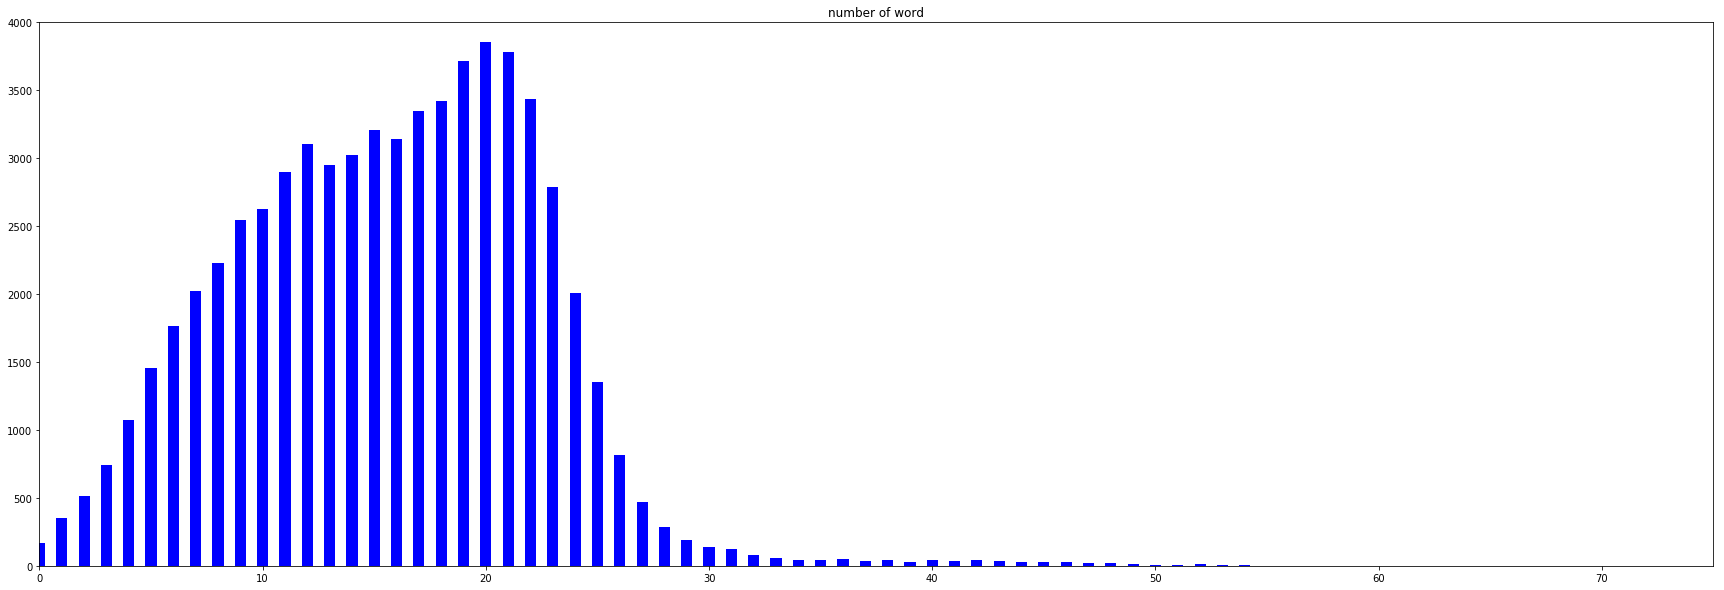

None
6063 tweets have been deleted by nb of word


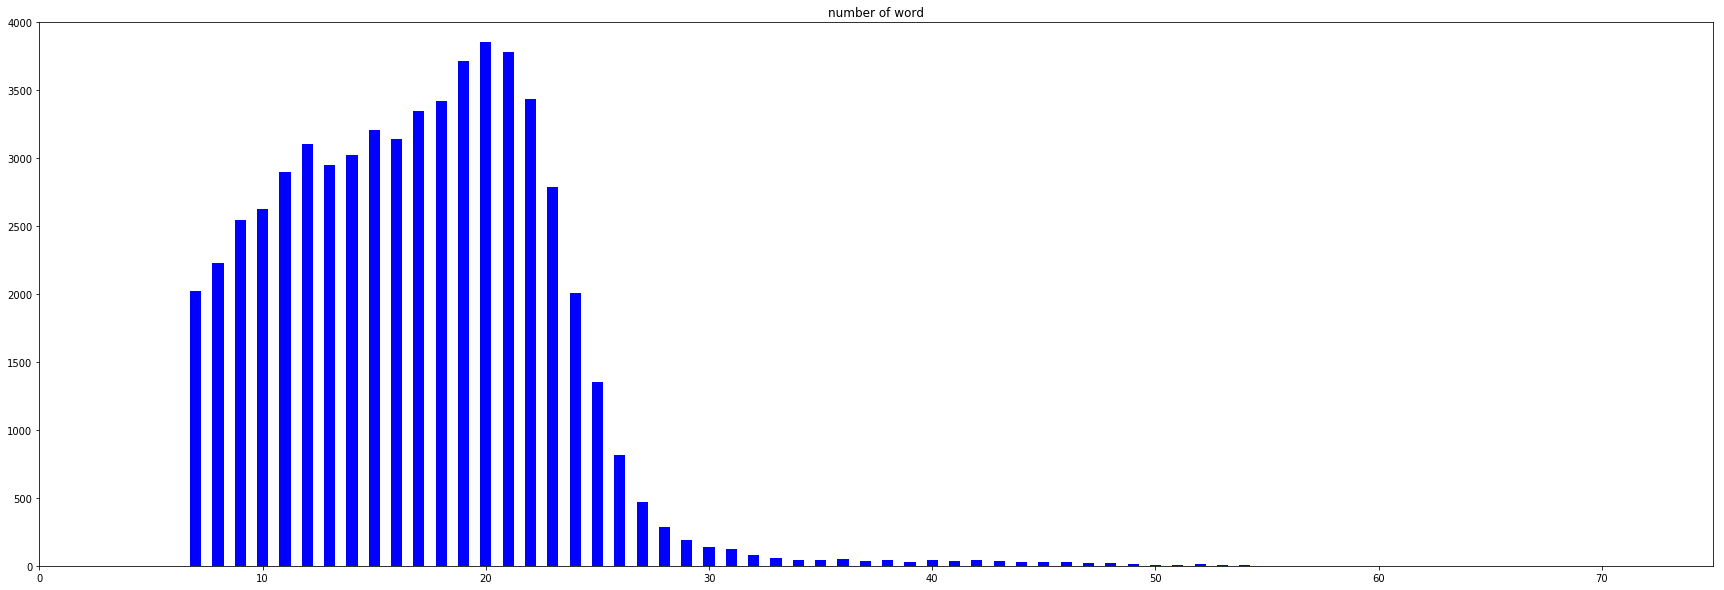

None


C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

280 tweets have been deleted 
 there are 0 errors


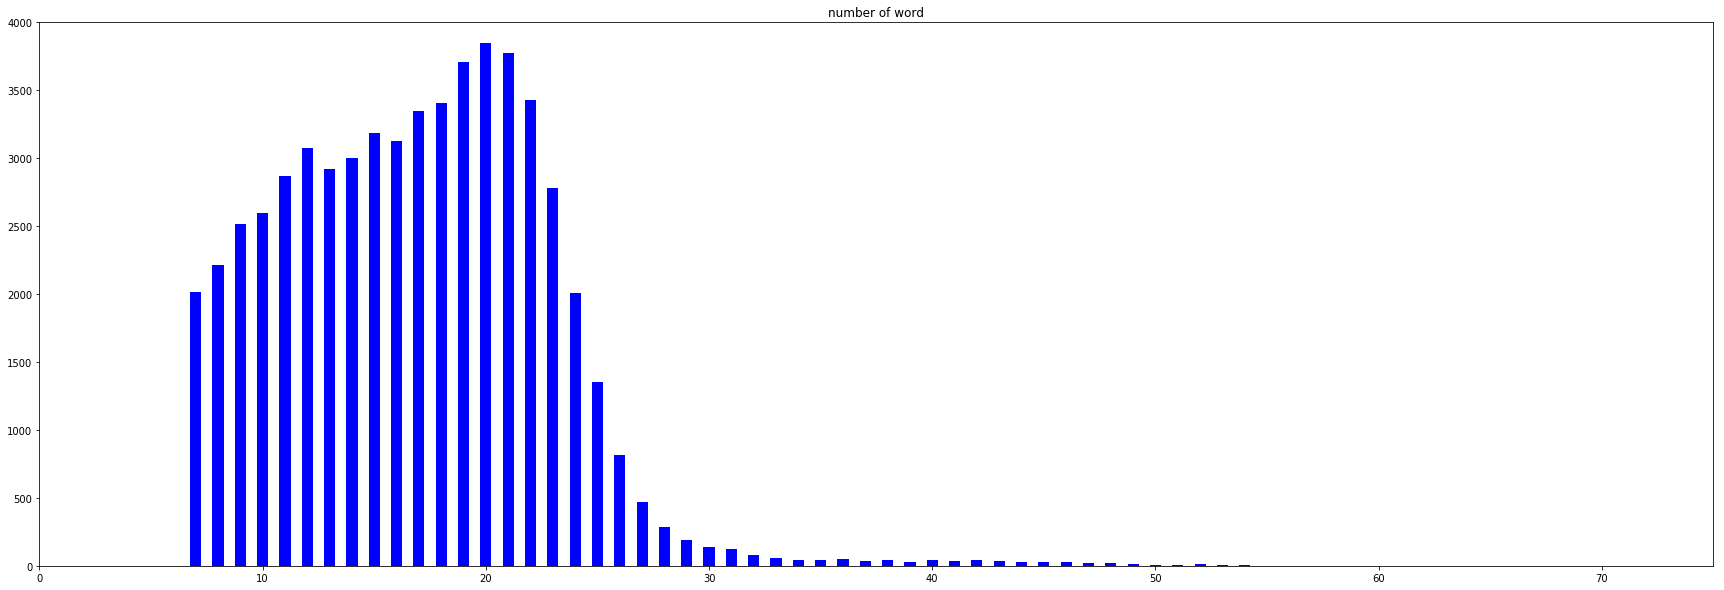

None


C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


28945 tweets have been deleted 
 there are 0 errors


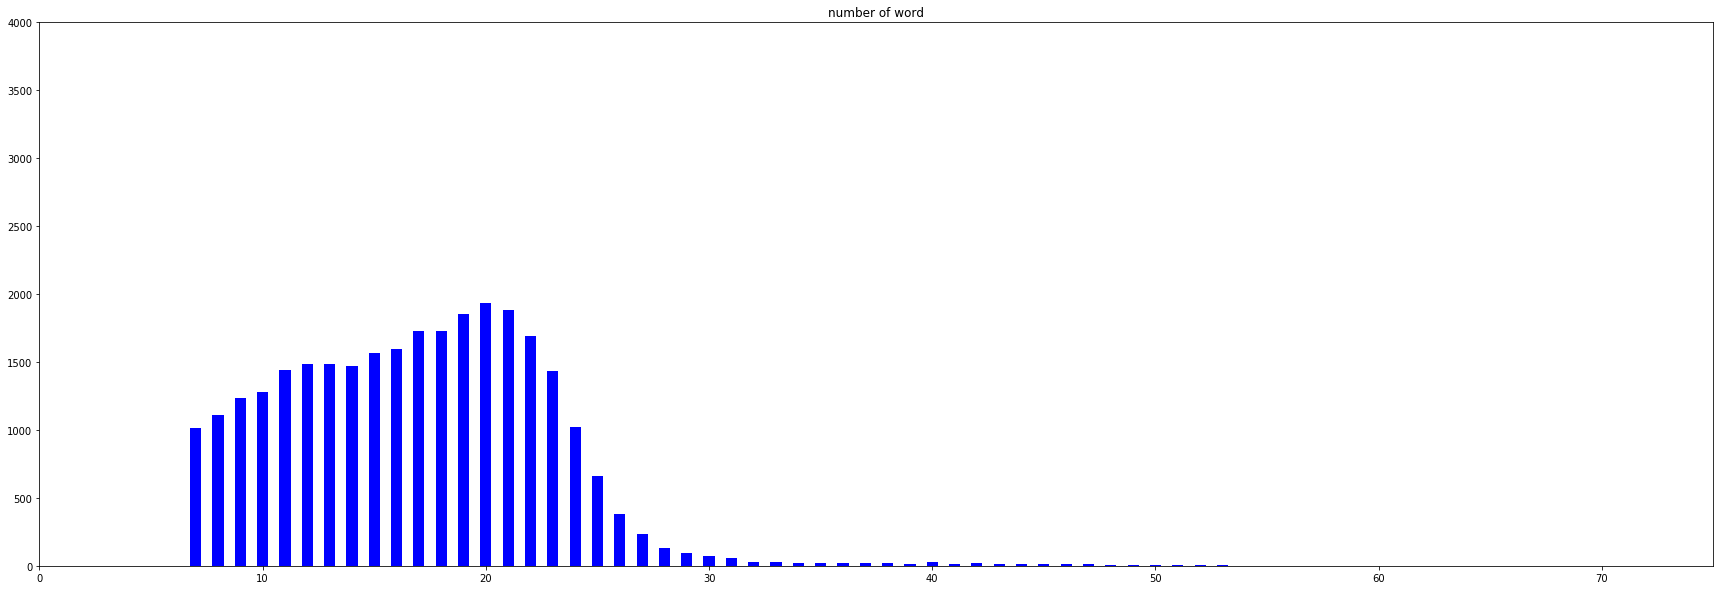

None


C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


907 tweets have been deleted 
 there are 0 errors


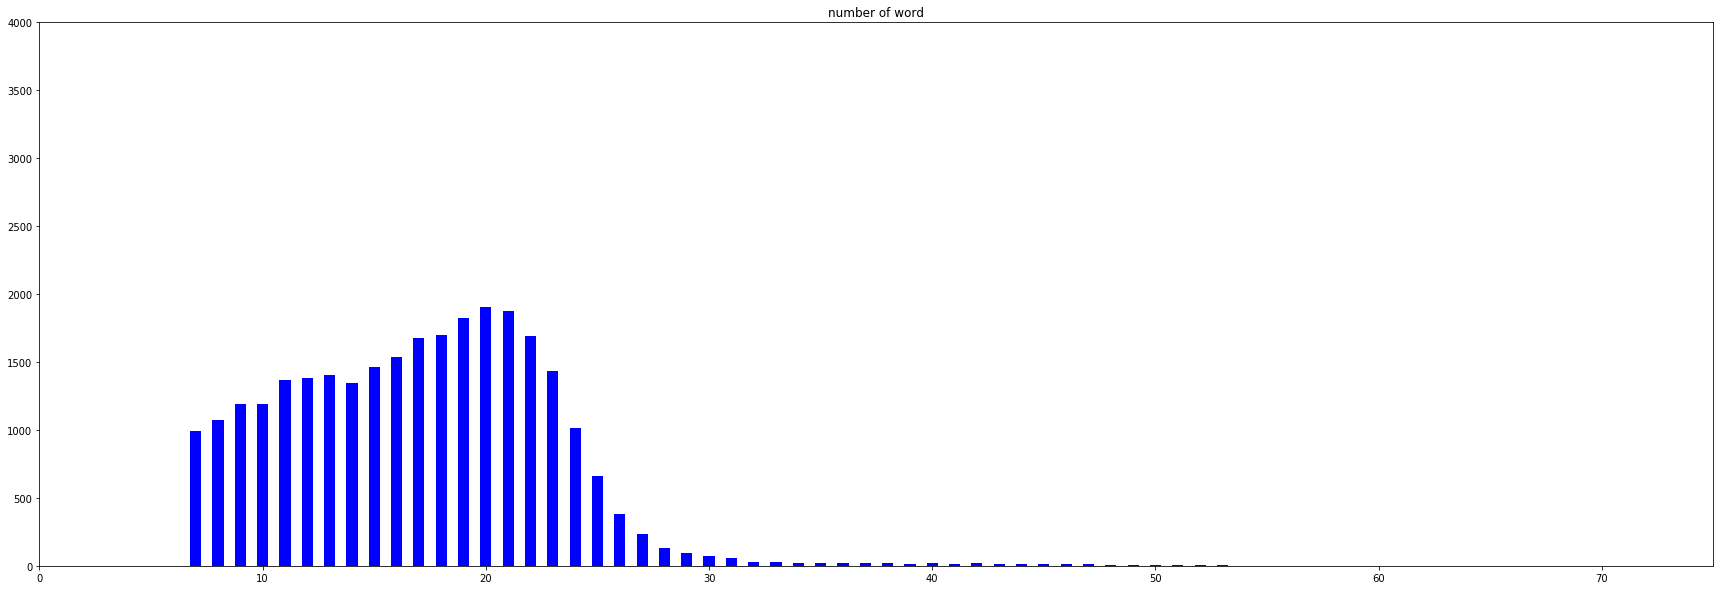

None


In [6]:
df_final=cleaning2(df_tweet,users,mentions,find_hashtag)
save(df_final,'BTP_tweets_2nd_cleaning.json')

In [9]:
json_clean_tweet_btp='C:/Users/Robin/BTP_tweets_2nd_cleaning.json'
df_clean= pd.read_json(json_clean_tweet_btp, orient="columns")
df_clean['text']

10       Des femmes qui veulent imiter des hommes profe...
100      Mettre des lunettes de vue au bureau quand on ...
1000     Ils savent que cest malaisant mais ça les fait...
10000    Retour de boite entre amis je dors sur le cana...
10002    Tous les hmm  miaou  eh glissés ds les lieux p...
10004                  c’est quoi le truc  j’comprends pas
10006    Non mais j’hallucine  je lis des trucs  mais j...
10008    Quand je lis  je suis stressée du monde dans l...
10010    Il faut du courage pour raconter son agression...
10012        Il y en a marre d’invisibiliser ces hommes  …
10016      hommes dans le train pr mantes  mont bloquer...
10018    Des que je vais aux WC  il y a une collegue qu...
1002     Whaou   Il était temps   Bravo et solidarité a...
10020     le hashtag qui en dit tant sur notre vie au t...
10022    Tas bien fait  Entre les médecins qui sinsulte...
10025    Une fois je sortais de chez le coiffeur et une...
10027    إفضحيالحيوان toi aussi raconte en donnant le n.

In [ ]:
#test
#print(len(df_tweet))
#drop_by_users(df_tweet,7)
#print(len(df_tweet))
##df_tweet['mention']=df_tweet['mention'].map(lower)

#df_tweet= df_tweet.reset_index(drop=True)
#add_nombre_mot(df_tweet)
#print(df_tweet['nb_mots'].quantile([0.1,0.25, 0.5, 0.75]))
#df_tweet2=df_tweet[df_tweet['nb_mots']>=7]
##add_nombre_mot(df_tweet)
#print(len(df_tweet['nb_mots']))
#distribution(df_tweet,'nb_mots','number of word',75,5000)
##delete_short(df_tweet,7)
#print(len(df_tweet2['nb_mots']))
#distribution(df_tweet2,'nb_mots','number of word',75,4000)
#df_test=df_tweet[:2000]


#drop_mention(df_tweet,mentions)
#df_tweet3=df_tweet[df_tweet['mention']=='@bfmtv']
#df_tweet3=df_tweet[df_tweet['mention'].str.contains(x) for x in mentions]
#formalize(df_tweet)
#print(len(df_tweet))
##drop_user(df_tweet,users)
##drop_mention(df_tweet,users)
#drop_by_hashtag(df_tweet,find_hashtag)
##print(len(df_test))
##for user in users :
##    df2=df_test[df_test['user']!=user]
##print(len(df2))  